# Roasted Coffee Beans Classification Model with Mobilenetv2

Model ini digunakan untuk melakukan klasifikasi biji coffee berdasarkan level roasting-nya. Dataset yang digunakan berasal dari Kaggle.com yang terdiri dari 4 class, yaitu Green, Light, Medium, dan Dark. 

Dataset yang digunakan berjumlah 1600. Dengan distribusi sebagai berikut:  
* 1200 gambar untuk data train (75%)
* 400  gambar untuk data test  (25%)

[Link Dataset - Coffee Bean Dataset](https://www.kaggle.com/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224)

## Importing the necessary libraries


In [ ]:
import os
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import time, copy, argparse
import multiprocessing
import matplotlib.pyplot as plt

from PIL import Image
from tensorflow import keras
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# Print tensorflow version
print(tf.__version__)

2.12.0


## Mount to Google Drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/My Drive/coffee_bean_roasting_level/
!ls

/content/drive/My Drive/coffee_bean_roasting_level
model  test  train


## Data processing and exploration

In [ ]:
data_dir = './coffe_bean_roasting_level'
train_dir = './train'
test_dir = './test'

print("Folders in Train dir:\t", os.listdir(train_dir))
print("Folders in Test dir :\t", os.listdir(test_dir))

Folders in Train dir:	 ['Dark', 'Green', 'Light', 'Medium']
Folders in Test dir :	 ['Dark', 'Green', 'Light', 'Medium']


In [ ]:
green_coffe_bean_train_dir = os.path.join(train_dir, "Green")
light_coffe_bean_train_dir = os.path.join(train_dir, "Light")
medium_coffe_bean_train_dir = os.path.join(train_dir, "Medium")
dark_coffe_bean_train_dir = os.path.join(train_dir, "Dark")

print("The number of Green Coffee Beans in the data train \t:", len(os.listdir(green_coffe_bean_train_dir)))
print("The number of Light Coffee Beans in the data train \t:", len(os.listdir(light_coffe_bean_train_dir)))
print("The number of Medium Coffee Beans in the data train \t:", len(os.listdir(medium_coffe_bean_train_dir)))
print("The number of Dark Coffee Beans in the data train \t:", len(os.listdir(dark_coffe_bean_train_dir)))

green_coffe_bean_test_dir = os.path.join(test_dir, "Green")
light_coffe_bean_test_dir = os.path.join(test_dir, "Light")
medium_coffe_bean_test_dir = os.path.join(test_dir, "Medium")
dark_coffe_bean_test_dir = os.path.join(test_dir, "Dark")

print("\nThe number of Green Coffee Beans in the data test \t:", len(os.listdir(green_coffe_bean_test_dir)))
print("The number of Light Coffee Beans in the data test \t:", len(os.listdir(light_coffe_bean_test_dir)))
print("The number of Medium Coffee Beans in the data test \t:", len(os.listdir(medium_coffe_bean_test_dir)))
print("The number of Dark Coffee Beans in the data test \t:", len(os.listdir(dark_coffe_bean_test_dir)))

The number of Green Coffee Beans in the data train 	: 300
The number of Light Coffee Beans in the data train 	: 300
The number of Medium Coffee Beans in the data train 	: 300
The number of Dark Coffee Beans in the data train 	: 300

The number of Green Coffee Beans in the data test 	: 100
The number of Light Coffee Beans in the data test 	: 100
The number of Medium Coffee Beans in the data test 	: 100
The number of Dark Coffee Beans in the data test 	: 100


In [ ]:
file_coffee_bean_green = os.listdir(green_coffe_bean_train_dir)
print(file_coffee_bean_green[:10])
file_coffee_bean_light = os.listdir(light_coffe_bean_train_dir)
print(file_coffee_bean_light[:10])
file_coffee_bean_medium = os.listdir(medium_coffe_bean_train_dir)
print(file_coffee_bean_medium[:10])
file_coffee_bean_dark = os.listdir(dark_coffe_bean_train_dir)
print(file_coffee_bean_dark[:10])

['green (1).png', 'green (100).png', 'green (10).png', 'green (101).png', 'green (102).png', 'green (103).png', 'green (104).png', 'green (105).png', 'green (108).png', 'green (106).png']
['light (97).png', 'light (92).png', 'light (99).png', 'light (94).png', 'light (93).png', 'light (95).png', 'light (98).png', 'light (96).png', 'light (10).png', 'light (100).png']
['medium (157).png', 'medium (159).png', 'medium (151).png', 'medium (1).png', 'medium (10).png', 'medium (156).png', 'medium (152).png', 'medium (153).png', 'medium (154).png', 'medium (155).png']
['dark (269).png', 'dark (171).png', 'dark (176).png', 'dark (170).png', 'dark (265).png', 'dark (177).png', 'dark (266).png', 'dark (172).png', 'dark (268).png', 'dark (274).png']


In [ ]:
green_coffee_bean_imgs = os.listdir(green_coffe_bean_train_dir)
light_coffee_bean_imgs = os.listdir(light_coffe_bean_train_dir)
medium_coffee_bean_imgs = os.listdir(medium_coffe_bean_train_dir)
dark_coffee_bean_imgs = os.listdir(dark_coffe_bean_train_dir)

## Data visualization

In [ ]:
def show_image(img, title=None):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')


 Sample Green Coffee Bean images:



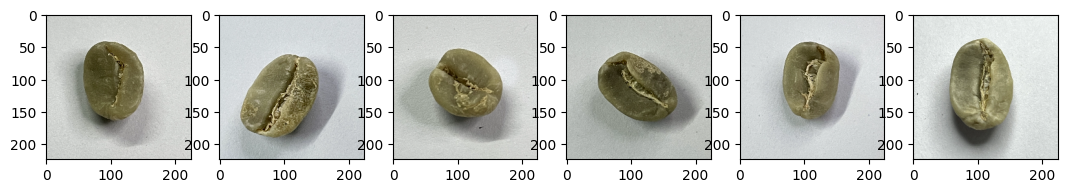

In [ ]:
print('\n Sample Green Coffee Bean images:\n')
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(green_coffee_bean_imgs[:6]):
  sp = plt.subplot(1, 10, i+1)
  img = mpimg.imread(os.path.join(green_coffe_bean_train_dir, img_path))
  plt.imshow(img)
plt.show()


 Sample Light Coffee Bean images:



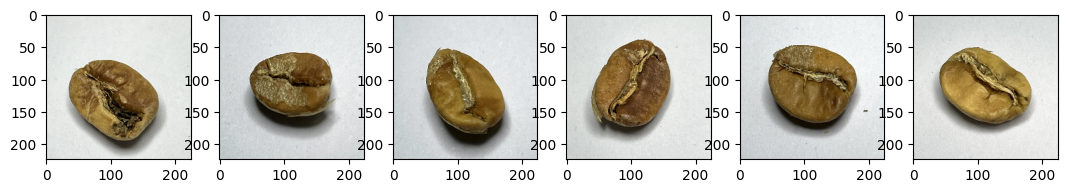

In [ ]:
print('\n Sample Light Coffee Bean images:\n')
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(light_coffee_bean_imgs[:6]):
  sp = plt.subplot(1, 10, i+1)
  img = mpimg.imread(os.path.join(light_coffe_bean_train_dir, img_path))
  plt.imshow(img)
plt.show()


 Sample Medium Coffee Bean images:



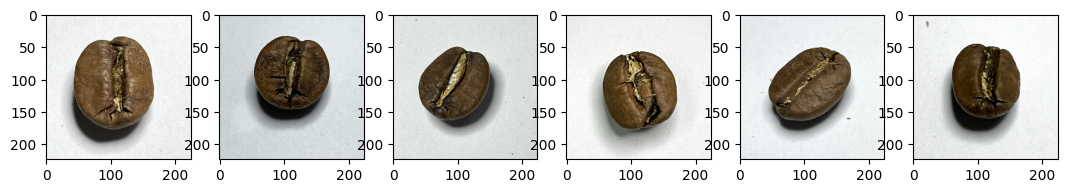

In [ ]:
print('\n Sample Medium Coffee Bean images:\n')
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(medium_coffee_bean_imgs[:6]):
  sp = plt.subplot(1, 10, i+1)
  img = mpimg.imread(os.path.join(medium_coffe_bean_train_dir, img_path))
  plt.imshow(img)
plt.show()


 Sample Dark Coffee Bean images:



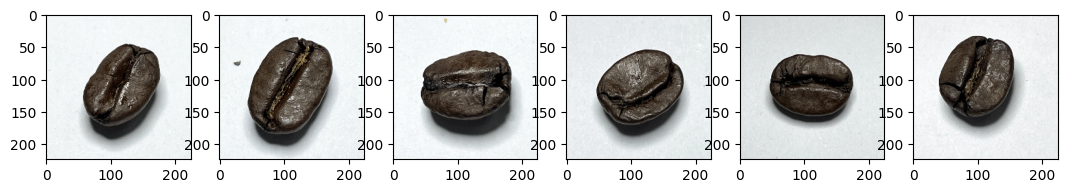

In [ ]:
print('\n Sample Dark Coffee Bean images:\n')
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(dark_coffee_bean_imgs[:6]):
  sp = plt.subplot(1, 10, i+1)
  img = mpimg.imread(os.path.join(dark_coffe_bean_train_dir, img_path))
  plt.imshow(img)
plt.show()

## Rescale the images and transfer them into batches

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=20,
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True,
    vertical_flip=True,
    )

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size = 32,
        target_size = (224,224),
        class_mode = 'categorical',
        color_mode = 'rgb',
)

validation_generator = validation_datagen.flow_from_directory(
        test_dir,
        batch_size = 32,
        target_size = (224,224),
        class_mode = 'categorical',
        color_mode = 'rgb',
)

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [ ]:
class_labels = list(train_generator.class_indices.keys())
print("Class Labels: ", class_labels)

Class Labels:  ['Dark', 'Green', 'Light', 'Medium']


In [ ]:
class_indices = train_generator.class_indices

# Show Index every class
for class_name, class_index in class_indices.items():
    print(f"Class: {class_name}, Indexs: {class_index}")

Class: Dark, Indexs: 0
Class: Green, Indexs: 1
Class: Light, Indexs: 2
Class: Medium, Indexs: 3


## Model building and training (MobileNetV2)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras import Model

# Model Functional API

pre_trained_model = MobileNetV2(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = 'imagenet')

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

def create_model():
  base_model = pre_trained_model.output
  # pooling = layers.GlobalAveragePooling2D()(base_model)
  flatten = layers.Flatten()(base_model)
  dense = layers.Dense(512, activation='relu')(flatten)
  dropout = layers.Dropout(0.2)(dense)
  outputs = Dense(4, activation='softmax')(dropout)

  model = Model(pre_trained_model.input, outputs)


# # Model Sequential API
# base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224,224,3))
# base_model.trainable = False

# def create_model():
#   model = Sequential([
#     base_model, 
#     # GlobalAveragePooling2D(),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.2),
#     Dense(4, activation='softmax')
# ])

# Compile  
  model.compile(
    loss='categorical_crossentropy',
    optimizer= tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
  return model

In [ ]:
model = create_model()

# displays the name of the model, the model type, and the model formula
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
# train model
history = model.fit(train_generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    )

Epoch 1/20
38/38 [==============================] - 25s 538ms/step - loss: 11.7517 - accuracy: 0.7108 - val_loss: 0.9175 - val_accuracy: 0.9050
Epoch 2/20
38/38 [==============================] - 21s 536ms/step - loss: 0.6951 - accuracy: 0.9225 - val_loss: 0.1872 - val_accuracy: 0.9725
Epoch 3/20
38/38 [==============================] - 19s 497ms/step - loss: 0.4534 - accuracy: 0.9325 - val_loss: 0.2052 - val_accuracy: 0.9675
Epoch 4/20
38/38 [==============================] - 20s 530ms/step - loss: 0.4531 - accuracy: 0.9300 - val_loss: 0.0717 - val_accuracy: 0.9750
Epoch 5/20
38/38 [==============================] - 19s 509ms/step - loss: 0.2342 - accuracy: 0.9433 - val_loss: 0.1385 - val_accuracy: 0.9675
Epoch 6/20
38/38 [==============================] - 20s 534ms/step - loss: 0.1567 - accuracy: 0.9508 - val_loss: 0.1176 - val_accuracy: 0.9625
Epoch 7/20
38/38 [==============================] - 19s 502ms/step - loss: 0.1561 - accuracy: 0.9525 - val_loss: 0.0651 - val_accuracy: 0.975

## Show plot the training and validation accuracies for each epoch

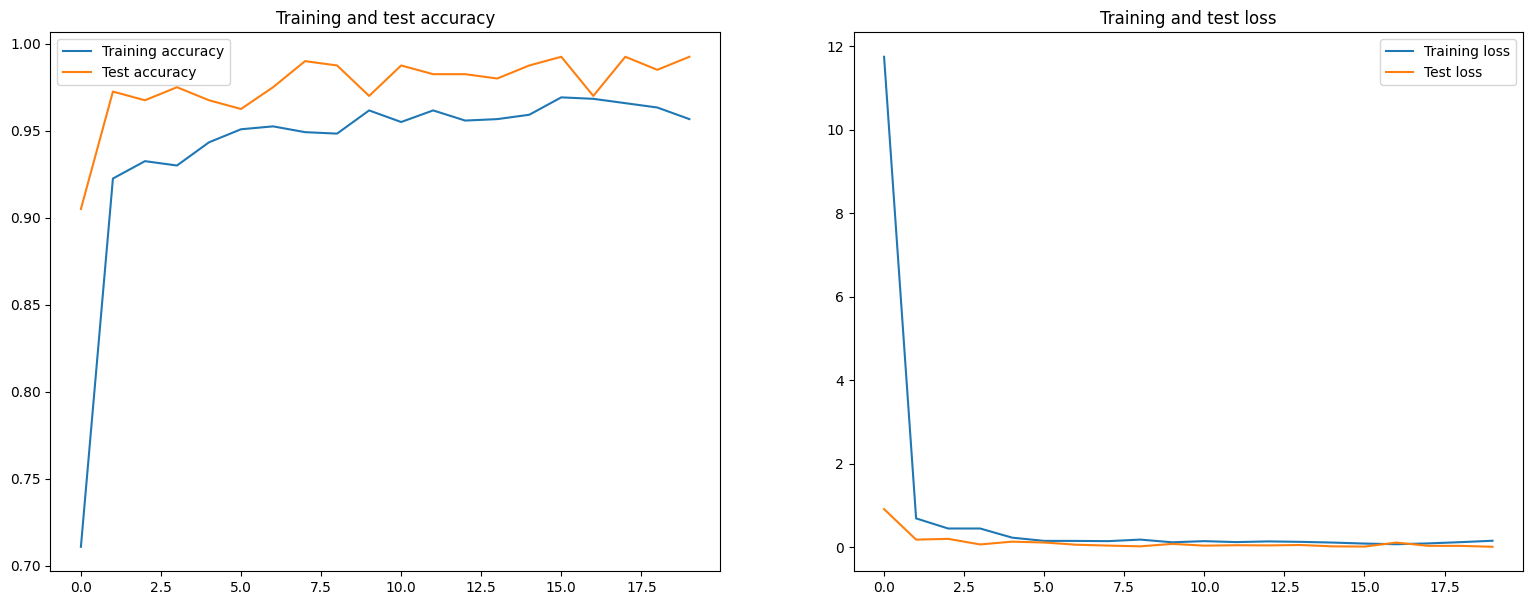

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(19, 7))

plt.subplot(1, 2, 1)
plt.title('Training and test accuracy')
plt.plot(history.epoch, history.history['accuracy'], label='Training accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Test accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Training and test loss')
plt.plot(history.epoch, history.history['loss'], label='Training loss')
plt.plot(history.epoch, history.history['val_loss'], label='Test loss')
plt.legend()

plt.show()

## Model Evaluation 

In [ ]:
# Train Score
# score = model.evaluate(train_generator)

# print('Loss: {:.4f}'.format(score[0]))
# print('Accuracy: {:.4f}'.format(score[1]))

In [ ]:
score = model.evaluate(validation_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

13/13 [==============================] - 2s 141ms/step - loss: 0.0156 - accuracy: 0.9925
Loss: 0.0156
Accuracy: 0.9925


## Model Prediction

In [ ]:
# #RUN CELL INI HANYA JIKA INGIN LOAD MODEL YANG SUDAH DILATIH DAN DISIMPAN DI FOLDER model_kualitas (SESUAIKAN PATH) 
# #SEHINGGA BISA LANGSUNG DIUJI DI CELL PREDIKSI TANPA MENGULANG PROSES TRAINING

# from tensorflow.keras.models import load_model
# model_path = '/content/drive/MyDrive/coffee_bean_roasting_level/model/model_roasted.h5'
# loaded_model = load_model(model_path)

In [ ]:
# # retrain model

# loaded_model.fit(train_generator,
#                     epochs = 20,
#                     validation_data = validation_generator,
#                     )

Saving hijau.jpeg to hijau.jpeg


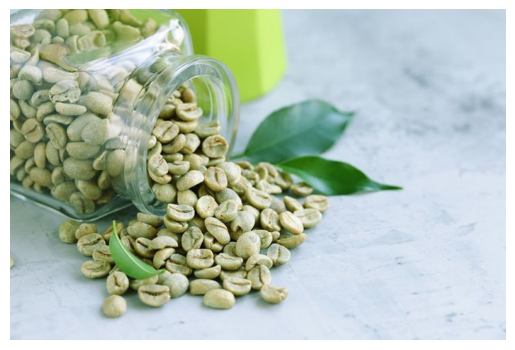

1/1 [==============================] - 0s 25ms/step
Prediction : Green


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  img = mpimg.imread(fn)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Mengubah gambar menjadi format yang dapat diprediksi oleh model
  img = image.load_img(fn, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0  # Melakukan normalisasi gambar

  # Melakukan prediksi menggunakan model
  prediction = model.predict(x)
  if prediction[0][0] > 0.8:
    print('Prediction : Dark')
  elif prediction[0][1] > 0.8:
    print('Prediction : Green')
  elif prediction[0][2] > 0.8:
    print('Prediction : Light')
  elif prediction[0][3] > 0.8:
    print('Prediction : Medium')
  else:
    print('Unknown')

## Saving Model

In [ ]:
# Path ke direktori di Google Drive Anda
drive_path = '/content/drive/MyDrive/coffee_bean_roasting_level'

# Buat direktori untuk menyimpan model jika belum ada
models_dir = os.path.join(drive_path, 'model')
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [ ]:
#Simpan model baru dengan nama baru
model.save(os.path.join(models_dir, 'model_roasted_final.h5'))

In [ ]:
#Cek apakah model berhasil tersimpan di drive
saved_model_path = os.path.join(models_dir, 'model_roasted_final.h5')
if os.path.exists(saved_model_path):
    print('Model berhasil disimpan di Google Drive.')
else:
    print('Model gagal disimpan di Google Drive.')

Model berhasil disimpan di Google Drive.


# Export Model

In [ ]:
# import tensorflowjs as tfjs

In [ ]:
# !pwd

In [ ]:
# model_path = "/content/drive/MyDrive/coffee_bean_roasting_level/model/"

# os.mkdir(model_path)

In [ ]:
# tfjs.converters.save_keras_model(model, model_path)

In [ ]:
# !ls /content/drive/MyDrive/coffee_bean_roasting_level/model/

In [ ]:
# from google.colab import files 

In [ ]:
# files.download('/content/drive/MyDrive/coffee_bean_roasting_level/model/model.json')